### Assignment
The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

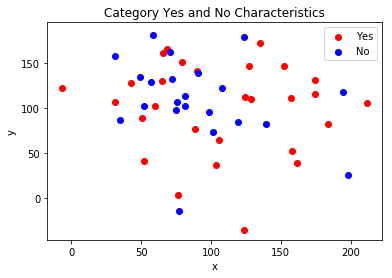

In [2]:
#initiate dataframe
data = pd.DataFrame()

#generate values
data['x'] = np.random.normal(100, 50, 50)
data['y'] = np.random.normal(100, 50, 50)

#generate classes
data['category'] = np.random.randint(2, size=50)

#generate second class class
x2 = np.random.normal(0, 100, 50)
y2 = np.random.normal(0, 100, 50)

#plot data
plt.scatter(data[data['category'] == 1].x, data[data['category'] == 1].y, color='red')
plt.scatter(data[data['category'] == 0].x, data[data['category'] == 0].y, color='blue')
plt.legend(['Yes', 'No'])
plt.title('Category Yes and No Characteristics')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#create algorithm
def NearestNeighbor(x_value, y_value, data, x_column, y_column, class_column):
    #iterate across data
    for row in data:
        #calculate distances
        data['distance'] = np.sqrt((data[x_column] - x_value)**2 + (data[y_column] - y_value)**2)
    #return category value of row with shortest distance
    return data[class_column].loc[data['distance'] == data['distance'].min()].iloc[0]
    
    
    

In [4]:
NearestNeighbor(0, 0, data, 'x', 'y', 'category')

1

Test on Music data from example

In [5]:
#music data from example
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [6]:
NearestNeighbor(24, 190, music, 'duration', 'loudness', 'jazz')

0

Compare to SKLearn package

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

Results are consistent.